<a href="https://colab.research.google.com/github/zhangou888/NN/blob/main/MLP_Example_(compare_with_GCN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP Example (No Graph)
## Step 1: Install Required Libraries

In [1]:
# Install PyTorch (use CPU version; change link if using GPU)
!pip install torch torchvision torchaudio
# # Install PyTorch Geometric dependencies
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-geometric

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
import importlib.util
import subprocess
import sys

def install_if_missing(package_name, pip_name=None):
    pip_name = pip_name or package_name
    if importlib.util.find_spec(package_name) is None:
        print(f"Installing {pip_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name])
    else:
        print(f"{package_name} is already installed.")

## Step 2: Import Libraries

In [3]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


## Step 3: Load the Cora Dataset
data.x: Node features (shape: [num_nodes, num_node_features])

data.edge_index: Graph connectivity (COO format: [2, num_edges])

data.y: Node labels (shape: [num_nodes])

data.train_mask, data.val_mask, data.test_mask: Boolean masks

In [4]:
# Load the Cora dataset from the Planetoid collection
dataset = Planetoid(root='data/Planetoid', name='Cora')

# Access the graph object (Cora has only one graph)
data = dataset[0]

Processing...
Done!


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

Number of nodes: 2708
Number of edges: 10556
Number of features per node: 1433
Number of classes: 7
Node feature shape: torch.Size([2708, 1433])
Edge index shape: torch.Size([2, 10556])

First 5 node features:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Label distribution:
Class 0: 351 nodes
Class 1: 217 nodes
Class 2: 418 nodes
Class 3: 818 nodes
Class 4: 426 nodes
Class 5: 298 nodes
Class 6: 180 nodes

Training set size: 140
Validation set size: 500
Test set size: 1000


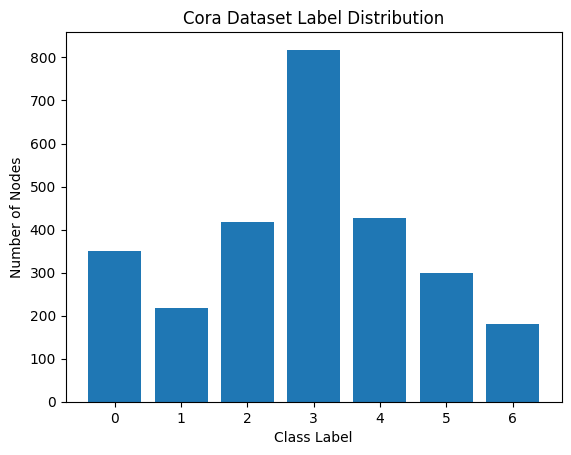

In [5]:
## Step 3.5: Check, Learn, and Understand the Data
print(data)

# Print basic properties of the dataset
print(f"\nNumber of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features per node: {data.num_node_features}")
print(f"Number of classes: {dataset.num_classes}")
print(f"Node feature shape: {data.x.shape}")
print(f"Edge index shape: {data.edge_index.shape}")

# Show first 5 feature vectors (sparse binary vectors)
print("\nFirst 5 node features:")
print(data.x[:5])

# Show the label distribution
import numpy as np
labels = data.y.numpy()
unique, counts = np.unique(labels, return_counts=True)
print("\nLabel distribution:")

for label, count in zip(unique, counts):
    print(f"Class {label}: {count} nodes")

# Check training/validation/test mask sizes
print("\nTraining set size:", data.train_mask.sum().item())
print("Validation set size:", data.val_mask.sum().item())
print("Test set size:", data.test_mask.sum().item())

# Visualize node label distribution (optional)
import matplotlib.pyplot as plt

plt.bar(unique, counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Nodes")
plt.title("Cora Dataset Label Distribution")
plt.show()

## Step 4.1: Define MLP Model (No GCNConv!)



In [6]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(dataset.num_node_features, 16)
        self.fc2 = nn.Linear(16, dataset.num_classes)

    def forward(self, data):
        x = data.x  # Only use node features — NO edge_index
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## Step 4.2 Define the GCN model

In [12]:
# Define a new Graph Convolutional Network model (GCN).
# It inherits from PyTorch's nn.Module, which is the base class for all neural network models.
class GCN(torch.nn.Module):
    def __init__(self):    # This is the constructor method, called when you do model = GCN().
                           # It sets up the layers and parameters your model will use.

        super().__init__()  # Required for your model to properly register parameters, layers, etc.

        # First GCN layer: from input features to 16 hidden units
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        # Second GCN layer: from 16 hidden units to number of classes
        self.conv2 = GCNConv(16, dataset.num_classes)

    #  forward pass: defines how input data flows through the model to produce output.
    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # First GCN layer + ReLU activation (Applies the first GCN layer)
        x = self.conv1(x, edge_index)

        x = F.relu(x) # Applies ReLU activation to introduce non-linearity.

        # Dropout for regularization (only during training)
        # Applies dropout to randomly zero some activations (only during training) to prevent overfitting.
        x = F.dropout(x, training=self.training)

        # Second GCN layer
        x = self.conv2(x, edge_index)

        # Log Softmax for classification (Applies log softmax across classes for each node (row-wise))
        return F.log_softmax(x, dim=1)

## Step 5: Replace GCN with MLP in Setup


In [8]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MLP().to(device)

data = data.to(device)
# MLP
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

if torch.cuda.is_available():
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

Using GPU: Tesla T4


## Step 6: Define Training Function

In [9]:
def train():
    model.train()

    optimizer.zero_grad()
    out1 = model(data)
    # Compute loss only on training nodes
    loss1 = F.nll_loss(out1[data.train_mask], data.y[data.train_mask])
    loss1.backward()
    optimizer1.step()
    return loss1.item()

## Step 7: Define Test Function

In [10]:
def test():
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)  # Get class predictions
    # Calculate accuracy on test set
    correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
    acc = int(correct) / int(data.test_mask.sum())
    return acc

## Step 8: Run Training Loop and Compare
Notes
Model: MLP


In [11]:
for epoch in range(1, 201):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}")


Epoch 010, Loss: 1.1417, Test Acc: 0.4100
Epoch 020, Loss: 0.4969, Test Acc: 0.5200
Epoch 030, Loss: 0.2938, Test Acc: 0.5180
Epoch 040, Loss: 0.2046, Test Acc: 0.4820
Epoch 050, Loss: 0.2368, Test Acc: 0.4920
Epoch 060, Loss: 0.2175, Test Acc: 0.5070
Epoch 070, Loss: 0.1554, Test Acc: 0.5030
Epoch 080, Loss: 0.2135, Test Acc: 0.4970
Epoch 090, Loss: 0.1870, Test Acc: 0.5170
Epoch 100, Loss: 0.1977, Test Acc: 0.5050
Epoch 110, Loss: 0.2196, Test Acc: 0.5010
Epoch 120, Loss: 0.1981, Test Acc: 0.5050
Epoch 130, Loss: 0.1908, Test Acc: 0.4960
Epoch 140, Loss: 0.1864, Test Acc: 0.5110
Epoch 150, Loss: 0.1695, Test Acc: 0.5160
Epoch 160, Loss: 0.1711, Test Acc: 0.5300
Epoch 170, Loss: 0.1740, Test Acc: 0.5220
Epoch 180, Loss: 0.1677, Test Acc: 0.5180
Epoch 190, Loss: 0.1782, Test Acc: 0.5230
Epoch 200, Loss: 0.1671, Test Acc: 0.5160
